In [847]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
os.getcwd()
os.chdir('/Users/fionachow/Documents/NYU/CDS/Spring 2023/1017 - Responsible Data Science/Project/algaebloom/data')
import warnings

In [848]:
metadata = pd.read_csv('./metadata.csv')
train = pd.read_csv('./train_labels.csv')

In [849]:
#filter for training data
metadata = metadata[metadata['split'] == 'train']

metadata

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train
5,aafl,39.474744,-86.898353,2021-08-23,train
...,...,...,...,...,...
23562,zzsv,38.707825,-75.080867,2018-06-27,train
23564,zzuq,35.794000,-79.015368,2015-08-06,train
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train


In [850]:
#covert date column from object to datetime
metadata['date'] = pd.to_datetime(metadata['date'])

In [851]:
#filter for date >2016; using Jennah's function
def filter_time(data):
    return data.loc[data['date'].dt.year > 2016]

metadata = filter_time(metadata)

metadata

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
2,aacd,35.875083,-78.878434,2020-11-19,train
4,aaff,38.049471,-99.827001,2019-07-23,train
5,aafl,39.474744,-86.898353,2021-08-23,train
6,aafp,35.647742,-79.271782,2017-11-15,train
...,...,...,...,...,...
23558,zzqy,37.928600,-121.561000,2018-05-15,train
23559,zzrl,36.170000,-79.052197,2018-06-28,train
23561,zzry,38.256057,-86.776403,2021-07-19,train
23562,zzsv,38.707825,-75.080867,2018-06-27,train


In [852]:
#merge metadata and trainlabels
combined_metadata = metadata.merge(train, how='left', on="uid")

combined_metadata

,uid,latitude,longitude,date,split,region,severity,density
0,aabm,39.080319,-86.430867,2018-05-14,train,midwest,1,585.0
1,aacd,35.875083,-78.878434,2020-11-19,train,south,1,290.0
2,aaff,38.049471,-99.827001,2019-07-23,train,midwest,3,111825.0
3,aafl,39.474744,-86.898353,2021-08-23,train,midwest,4,2017313.0
4,aafp,35.647742,-79.271782,2017-11-15,train,south,1,1594.0
...,...,...,...,...,...,...,...,...
9462,zzqy,37.928600,-121.561000,2018-05-15,train,west,4,5548841.0
9463,zzrl,36.170000,-79.052197,2018-06-28,train,south,1,4293.0
9464,zzry,38.256057,-86.776403,2021-07-19,train,midwest,2,63056.0
9465,zzsv,38.707825,-75.080867,2018-06-27,train,south,3,113125.0


In [853]:
#concatenate latitude and longitude
combined_metadata['lat_long'] = combined_metadata.apply(lambda x: ','.join([str(x['latitude']), str(x['longitude'])]), axis=1)

combined_metadata

,uid,latitude,longitude,date,split,region,severity,density,lat_long
0,aabm,39.080319,-86.430867,2018-05-14,train,midwest,1,585.0,"39.0803190688889,-86.4308666666667"
1,aacd,35.875083,-78.878434,2020-11-19,train,south,1,290.0,"35.8750832404158,-78.8784342810571"
2,aaff,38.049471,-99.827001,2019-07-23,train,midwest,3,111825.0,"38.04947082,-99.82700111"
3,aafl,39.474744,-86.898353,2021-08-23,train,midwest,4,2017313.0,"39.474744,-86.898353"
4,aafp,35.647742,-79.271782,2017-11-15,train,south,1,1594.0,"35.6477424743416,-79.2717820986074"
...,...,...,...,...,...,...,...,...,...
9462,zzqy,37.928600,-121.561000,2018-05-15,train,west,4,5548841.0,"37.9286,-121.561"
9463,zzrl,36.170000,-79.052197,2018-06-28,train,south,1,4293.0,"36.17,-79.0521967454887"
9464,zzry,38.256057,-86.776403,2021-07-19,train,midwest,2,63056.0,"38.2560566666667,-86.7764030555555"
9465,zzsv,38.707825,-75.080867,2018-06-27,train,south,3,113125.0,"38.7078250249227,-75.0808666706085"


In [854]:
#count number of values for each distinct lat_long
counts_lat_long = combined_metadata['lat_long'].value_counts()
counts_lat_long_df = counts_lat_long.reset_index()
counts_lat_long_df.columns = ['lat_long', 'count']


In [855]:
#merge with uid and region from combined_metadata
lat_long = counts_lat_long_df.merge(combined_metadata, how='left', on="lat_long").drop(columns=['latitude', 'longitude','date','split','severity','density'])
lat_long.reset_index(drop=True, inplace=True)

lat_long

,lat_long,count,uid,region
0,"37.2639,-120.906",60,apcu,west
1,"37.2639,-120.906",60,apsz,west
2,"37.2639,-120.906",60,asgu,west
3,"37.2639,-120.906",60,axni,west
4,"37.2639,-120.906",60,birw,west
...,...,...,...,...
9462,"35.6930672817339,-79.1875961786702",1,iykn,south
9463,"35.6904058133021,-79.1925395679795",1,iyij,south
9464,"36.04,-79.0889755619498",1,iygu,south
9465,"35.6488336763986,-79.2697553089906",1,iydr,south


In [856]:
# testing shift function - works
# lat_long['prev_column'] = lat_long['lat_long'].shift()

# lat_long.head(11581)

In [857]:
#testing mask - works
# mask = lat_long['lat_long'] != lat_long['prev_column']
# lat_long = lat_long[mask]

# lat_long

In [858]:
regions_count_wanted_train = {'midwest':387,'northeast':201,'south':1749,'west':663}
regions_count_wanted_test = {'midwest':300, 'northeast':267, 'south':300, 'west':300}

def stratified_sampling_with_size_constraint(data, random_state=10):
    train_lat_long = pd.DataFrame(columns=['lat_long','region','count'])
    test_lat_long = pd.DataFrame(columns=['lat_long','region','count'])

    train_lat_long_set = set()
    test_lat_long_set = set()

    for (train_key, train_value), (test_key, test_value) in zip(regions_count_wanted_train.items(), regions_count_wanted_test.items()):
        train_group_size = train_value
        train_group_count = 0

        test_group_size = test_value
        test_group_count = 0

        train_group, test_group = pd.DataFrame(columns=['lat_long','region','count']), pd.DataFrame(columns=['lat_long','region','count'])
        shuffled_group = data.sample(frac=1, random_state=random_state).reset_index(drop=True)#inducing randomness here
        shuffled_group['prev_column'] = shuffled_group['lat_long'].shift() 
        #create a boolean mask that selects only the rows where the lat_long value is not the same as the previous row's lat_long value
        #do this to ensure each distinct lat_long only shows up in either train or test set
        mask = shuffled_group['lat_long'] != shuffled_group['prev_column'] 
        shuffled_group = shuffled_group[mask].reset_index(drop=True)
        
        #we do this because counts of lat_long keys are not necessarily 1 for 1 relationship with uids and we are constraining the train/test split to a certain train/test size
        for index, row in shuffled_group.iterrows():
            lat_long = row['lat_long']
            #do this to ensure each distinct lat_long only shows up in either train or test set
            if lat_long not in train_lat_long_set and lat_long not in test_lat_long_set:       
                if train_group_count + row['count'] <= train_group_size and (row['region']==train_key):
                    train_group.at[train_group_count, 'lat_long'] = row['lat_long']
                    train_group.at[train_group_count, 'region'] = row['region']
                    train_group.at[train_group_count, 'count'] = row['count']
                    train_group_count += row['count']
                    train_lat_long_set.add(lat_long)
                    # print(f'train_group_count: {train_group_count}',row['lat_long'],train_key)
                elif test_group_count + row['count'] <= test_group_size and (row['region']==test_key):
                    test_group.at[test_group_count, 'lat_long'] = row['lat_long']
                    test_group.at[test_group_count, 'region'] = row['region']
                    test_group.at[test_group_count, 'count'] = row['count']
                    test_group_count += row['count']
                    test_lat_long_set.add(lat_long)
                    # print(f'test_group_count: {test_group_count}',row['lat_long'],test_key)
                
        train_lat_long = train_lat_long.append(train_group).reset_index(drop=True)
        test_lat_long = test_lat_long.append(test_group).reset_index(drop=True)

    return train_lat_long, test_lat_long

In [859]:
#train_lat_long output
train_lat_long, test_lat_long = stratified_sampling_with_size_constraint(lat_long, random_state=10)

train_lat_long

,lat_long,region,count
0,"38.0475265,-99.82633869",midwest,4
1,"38.84759761,-97.58813777",midwest,10
2,"39.7469388888889,-87.0759805555555",midwest,36
3,"44.1,-82.116667",midwest,6
4,"41.3305639294444,-85.3836083333333",midwest,29
...,...,...,...
1510,"37.4368,-121.133",west,2
1511,"38.0601,-121.499",west,4
1512,"47.91805,-120.1638",west,1
1513,"37.3032,-122.075",west,2


In [860]:
test_lat_long

,lat_long,region,count
0,"45.278333,-82.451667",midwest,6
1,"41.702596,-85.022696",midwest,24
2,"38.04772,-97.20234",midwest,6
3,"37.78239812,-97.53105031",midwest,5
4,"45.45,-82.915",midwest,6
...,...,...,...
446,"38.307,-121.794",west,43
447,"37.5582,-121.164",west,27
448,"39.1853,-121.704",west,19
449,"44.54843,-123.3458",west,1


In [861]:
#Checking region counts for training/test set
midwest = train_lat_long[train_lat_long['region']=='midwest']['count'].astype(int).sum()
northeast = train_lat_long[train_lat_long['region']=='northeast']['count'].astype(int).sum()
south = train_lat_long[train_lat_long['region']=='south']['count'].astype(int).sum()
west = train_lat_long[train_lat_long['region']=='west']['count'].astype(int).sum()

print("TRAIN")
print(f'midwest:{midwest}, northeast:{northeast}, south:{south}, west:{west}')
print("-------------------")

midwest2 = test_lat_long[test_lat_long['region']=='midwest']['count'].astype(int).sum()
northeast2 = test_lat_long[test_lat_long['region']=='northeast']['count'].astype(int).sum()
south2 = test_lat_long[test_lat_long['region']=='south']['count'].astype(int).sum()
west2 = test_lat_long[test_lat_long['region']=='west']['count'].astype(int).sum()

print("TEST")
print(f'midwest: {midwest2}, northwest:{northeast2}, south:{south2}, west:{west2}')

TRAIN
midwest:387, northeast:201, south:1749, west:663
-------------------
TEST
midwest: 300, northwest:267, south:300, west:300


In [862]:
#populating new train/test labels by first combining dataframes

combined_metadata = combined_metadata.merge(train_lat_long, how='left', on="lat_long")

combined_metadata['region_y'] = combined_metadata['region_y'].replace('midwest', 'train')
combined_metadata['region_y'] = combined_metadata['region_y'].replace('northeast', 'train')
combined_metadata['region_y'] = combined_metadata['region_y'].replace('south', 'train')
combined_metadata['region_y'] = combined_metadata['region_y'].replace('west', 'train')

combined_metadata = combined_metadata.merge(test_lat_long, how='left', on="lat_long")

combined_metadata['region'] = combined_metadata['region'].replace('midwest', 'test')
combined_metadata['region'] = combined_metadata['region'].replace('northeast', 'test')
combined_metadata['region'] = combined_metadata['region'].replace('south', 'test')
combined_metadata['region'] = combined_metadata['region'].replace('west', 'test')


combined_metadata


,uid,latitude,longitude,date,split,region_x,severity,density,lat_long,region_y,count_x,region,count_y
0,aabm,39.080319,-86.430867,2018-05-14,train,midwest,1,585.0,"39.0803190688889,-86.4308666666667",train,26,NaN,NaN
1,aacd,35.875083,-78.878434,2020-11-19,train,south,1,290.0,"35.8750832404158,-78.8784342810571",NaN,NaN,NaN,NaN
2,aaff,38.049471,-99.827001,2019-07-23,train,midwest,3,111825.0,"38.04947082,-99.82700111",NaN,NaN,NaN,NaN
3,aafl,39.474744,-86.898353,2021-08-23,train,midwest,4,2017313.0,"39.474744,-86.898353",NaN,NaN,NaN,NaN
4,aafp,35.647742,-79.271782,2017-11-15,train,south,1,1594.0,"35.6477424743416,-79.2717820986074",train,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,zzqy,37.928600,-121.561000,2018-05-15,train,west,4,5548841.0,"37.9286,-121.561",NaN,NaN,test,11
9463,zzrl,36.170000,-79.052197,2018-06-28,train,south,1,4293.0,"36.17,-79.0521967454887",NaN,NaN,NaN,NaN
9464,zzry,38.256057,-86.776403,2021-07-19,train,midwest,2,63056.0,"38.2560566666667,-86.7764030555555",train,11,NaN,NaN
9465,zzsv,38.707825,-75.080867,2018-06-27,train,south,3,113125.0,"38.7078250249227,-75.0808666706085",train,16,NaN,NaN


In [863]:
# Combine 'region_y' and 'region' columns
combined_metadata['combined_region'] = combined_metadata['region_y'].combine_first(combined_metadata['region'])

# Drop rows where 'combined_region' is NaN
combined_metadata = combined_metadata.dropna(subset=['combined_region']).reset_index(drop=True)

combined_metadata = combined_metadata.drop(columns=['region_y', 'count_x','region','count_y','lat_long','split'])
combined_metadata = combined_metadata.rename(columns={'combined_region': 'split','region_x':'region'})

combined_metadata

,uid,latitude,longitude,date,region,severity,density,split
0,aabm,39.080319,-86.430867,2018-05-14,midwest,1,585.0,train
1,aafp,35.647742,-79.271782,2017-11-15,south,1,1594.0,train
2,aagm,35.906885,-79.132962,2020-06-10,south,1,3873.0,train
3,aaia,35.980000,-78.791686,2018-06-27,south,1,16943.0,train
4,aaql,38.691000,-100.924000,2018-08-13,midwest,3,289800.0,train
...,...,...,...,...,...,...,...,...
4162,zzkp,42.238550,-111.853100,2017-07-18,west,3,391600.0,test
4163,zzpz,35.726309,-79.125853,2019-07-17,south,3,118603.0,train
4164,zzqy,37.928600,-121.561000,2018-05-15,west,4,5548841.0,test
4165,zzry,38.256057,-86.776403,2021-07-19,midwest,2,63056.0,train


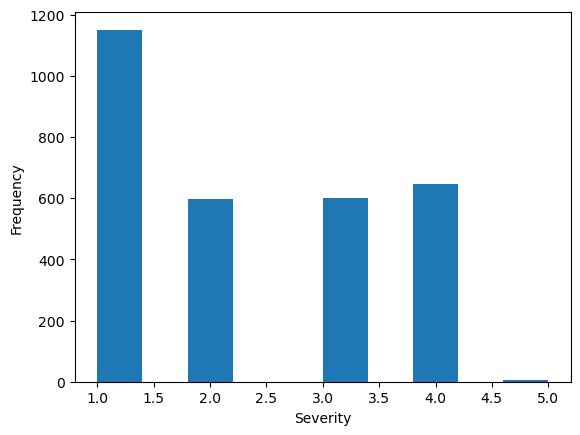

In [864]:
final_train_data =combined_metadata[combined_metadata['split']=='train']

# group the data by region and select the severity column
Severity = final_train_data['severity']

# plot a histogram of the severity column
plt.hist(Severity) #density=True
plt.xlabel('Severity')
plt.ylabel('Frequency')

plt.show() #looks pretty close to original distribution of training labels!

In [865]:
#create replacement train_labels.csv

train_labels = combined_metadata[combined_metadata['split']=='train'][['uid', 'region', 'severity', 'density']].reset_index(drop=True)

train_labels

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aafp,south,1,1594.0
2,aagm,south,1,3873.0
3,aaia,south,1,16943.0
4,aaql,midwest,3,289800.0
...,...,...,...,...
2995,zzeq,south,1,5809.0
2996,zzes,south,1,1452.0
2997,zzpz,south,3,118603.0
2998,zzry,midwest,2,63056.0


In [866]:
train_labels.to_csv('train_labels.csv', index=False)

In [867]:
#create replacement metadata.csv
metadata = combined_metadata[['uid', 'latitude', 'longitude', 'date','split']].reset_index(drop=True)

metadata

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aafp,35.647742,-79.271782,2017-11-15,train
2,aagm,35.906885,-79.132962,2020-06-10,train
3,aaia,35.980000,-78.791686,2018-06-27,train
4,aaql,38.691000,-100.924000,2018-08-13,train
...,...,...,...,...,...
4162,zzkp,42.238550,-111.853100,2017-07-18,test
4163,zzpz,35.726309,-79.125853,2019-07-17,train
4164,zzqy,37.928600,-121.561000,2018-05-15,test
4165,zzry,38.256057,-86.776403,2021-07-19,train


In [868]:
metadata.to_csv('metadata.csv', index=False)

In [869]:
#create test_labels.csv

test_labels = combined_metadata[combined_metadata['split']=='test'][['uid', 'region', 'severity', 'density']].reset_index(drop=True)

test_labels

,uid,region,severity,density
0,aarq,northeast,1,1.013300e+04
1,abjj,northeast,2,5.504933e+04
2,abrn,northeast,1,7.626285e+03
3,actk,northeast,1,1.267000e+03
4,adxo,northeast,1,5.300663e+03
...,...,...,...,...
1162,zyyw,west,4,6.332500e+06
1163,zzba,south,3,8.060140e+05
1164,zzcz,south,3,8.539400e+05
1165,zzkp,west,3,3.916000e+05


In [870]:
test_labels.to_csv('test_labels.csv', index=False)